## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

## Read Data

In [2]:
df = pd.read_csv("Data Laptop Final.csv")

In [3]:
df = df.drop_duplicates()

## Data Exploration

#### Find Correlation among Variables and Drop Features with Low Correlation

In [4]:
df.head()

,Device Type,Weight,Size,Resolution,PPI,Ethernet,Speed,Generation,Solid State Drive,Laptop Brand,...,Anti Glare Screen,Camera,Optical Drive,Processor,Brand,RAM,USB Type-C,USB 3.0,USB 2.0,Max Speed
0,Netbook,1.98,15.6,1920 x 1080 pixels,141,1,3.3,5,512,HP,...,1,1,0,AMD Ryzen 5,NVIDIA,8 GB DDR4,1,0,1,4.2
1,Netbook,2.10,15.6,1920 x 1080 pixels,141,1,3.3,12,512,Acer,...,0,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,3,0,3.3
2,Netbook,2.10,15.6,1920 x 1080 pixels,141,1,3.3,12,512,Acer,...,0,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,3,0,4.4
3,Netbook,2.25,15.6,1920 x 1080 pixels,141,1,2.5,11,256,Lenovo,...,1,1,0,Intel Core i5,NVIDIA,8 GB DDR4,1,2,0,3.2
4,Netbook,1.80,16.0,1200 x 1920 pixels,283,0,3.3,5,512,ASUS,...,1,1,0,AMD Ryzen 5,AMD,16 GB DDR4,1,2,1,4.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device Type        995 non-null    object 
 1   Weight             995 non-null    float64
 2   Size               995 non-null    float64
 3   Resolution         995 non-null    object 
 4   PPI                995 non-null    int64  
 5   Ethernet           995 non-null    int64  
 6   Speed              995 non-null    float64
 7   Generation         995 non-null    int64  
 8   Solid State Drive  995 non-null    int64  
 9   Laptop Brand       995 non-null    object 
 10  Price              995 non-null    float64
 11  OS                 995 non-null    object 
 12  Warranty           995 non-null    int64  
 13  Touch              995 non-null    int64  
 14  Anti Glare Screen  995 non-null    int64  
 15  Camera             995 non-null    int64  
 16  Optical Drive      995 non

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,995.0,2.293447e+00,4.903449e-01,1.18,2.15,2.3,2.4,8.500000e+00
Size,995.0,1.572271e+01,8.307464e-01,13.30,15.60,15.6,15.6,2.100000e+01
PPI,995.0,1.535296e+02,3.613664e+01,100.00,141.00,141.0,141.0,3.380000e+02
Ethernet,995.0,7.185930e-01,4.499117e-01,0.00,0.00,1.0,1.0,1.000000e+00
Speed,995.0,2.895779e+00,6.912519e-01,1.00,2.40,2.9,3.2,5.200000e+00
Generation,995.0,8.496482e+00,2.762340e+00,3.00,5.00,9.0,11.0,1.200000e+01
Solid State Drive,995.0,6.839960e+02,4.158677e+02,128.00,512.00,512.0,1024.0,4.096000e+03
Price,995.0,2.260375e+07,1.427010e+07,5467761.45,13573714.50,17910364.5,26880065.1,1.319848e+08
Warranty,995.0,1.114573e+00,3.998726e-01,0.00,1.00,1.0,1.0,3.000000e+00
Touch,995.0,4.120603e-02,1.988664e-01,0.00,0.00,0.0,0.0,1.000000e+00


In [7]:
df.describe(include='object')

,Device Type,Resolution,Laptop Brand,OS,Processor,Brand,RAM
count,995,995,995,995,995,995,995
unique,3,14,10,7,8,3,19
top,Netbook,1920 x 1080 pixels,ASUS,Windows 10 Home,Intel Core i7,NVIDIA,8 GB DDR4
freq,948,796,378,575,357,927,380


In [8]:
# Removed outlier in Price
df = df[df['Price'] != df['Price'].max()]

In [9]:
df.corr().loc['Price']

Weight               0.377438
Size                 0.241941
PPI                  0.382793
Ethernet            -0.137209
Speed                0.113198
Generation           0.141754
Solid State Drive    0.610715
Price                1.000000
Warranty             0.139199
Touch                0.211863
Anti Glare Screen   -0.095627
Camera              -0.076203
Optical Drive       -0.015829
USB Type-C           0.233796
USB 3.0              0.072999
USB 2.0             -0.199859
Max Speed            0.314711
Name: Price, dtype: float64

In [10]:
df = df.drop(['Ethernet', 'Speed', 'Generation', 'Warranty', 'Anti Glare Screen', 
                'Camera','Optical Drive', 'USB Type-C', 'USB 2.0', 'USB 3.0'], axis=1)

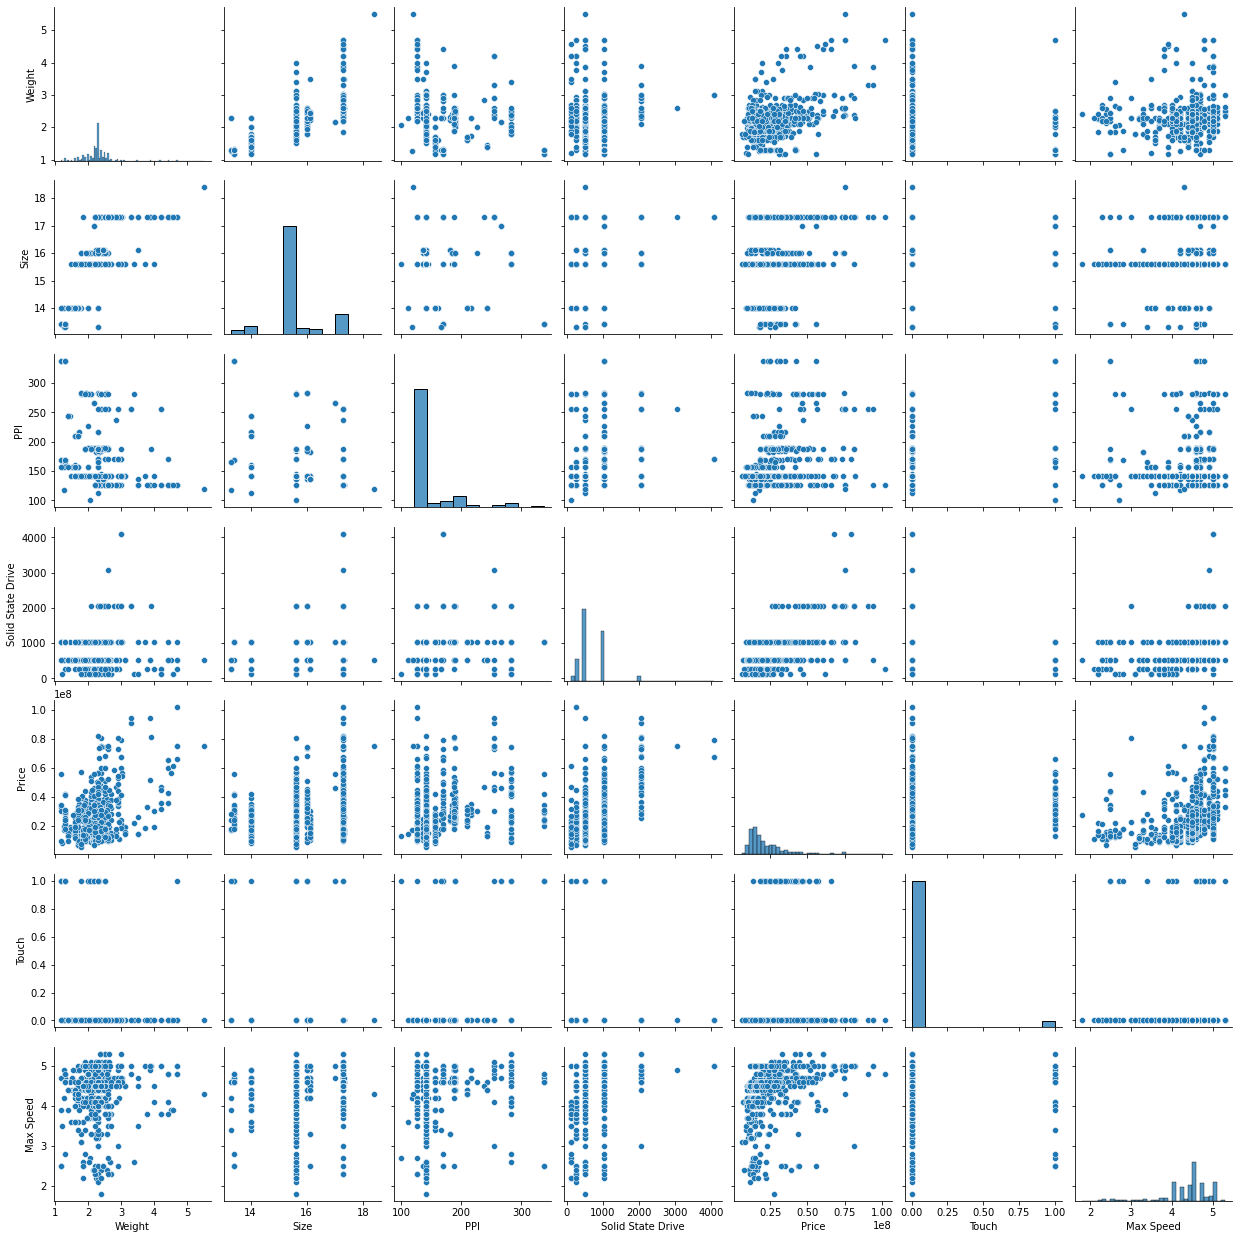

In [11]:
sns.pairplot(df)

<AxesSubplot:>

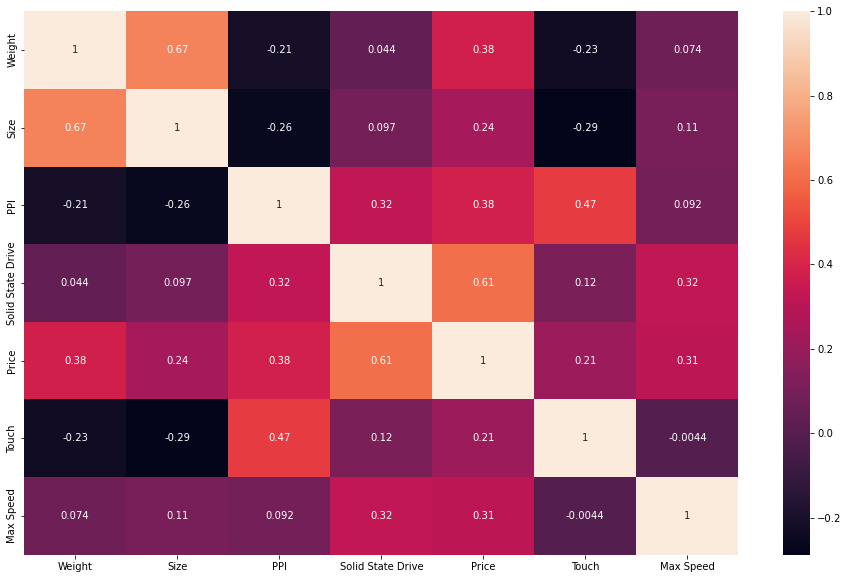

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

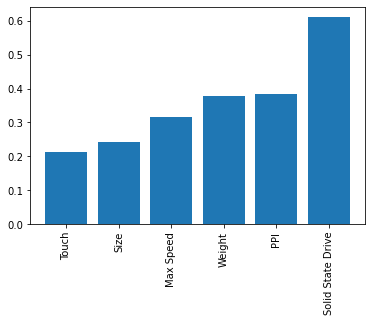

In [13]:
plt.bar(df.corr()['Price'].sort_values().drop('Price').index, 
    df.corr()['Price'].sort_values().drop('Price'))
plt.xticks(rotation=90);

#### Check Distribution of Price and its Correlation with Solid State Drive

<AxesSubplot:xlabel='Price', ylabel='Count'>

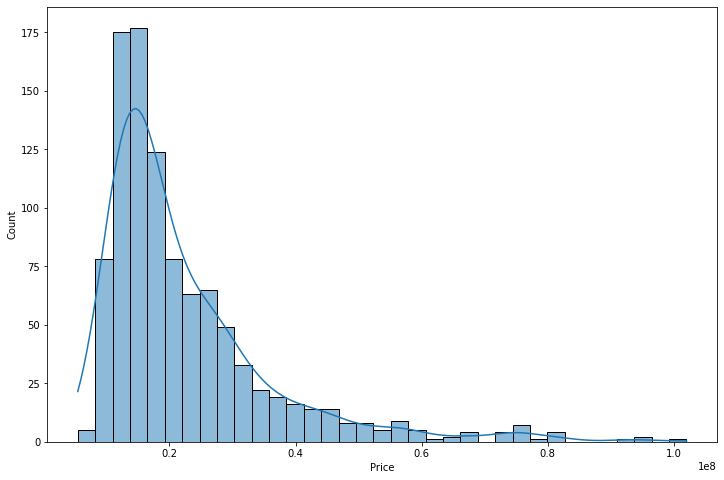

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Price', bins=35, kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

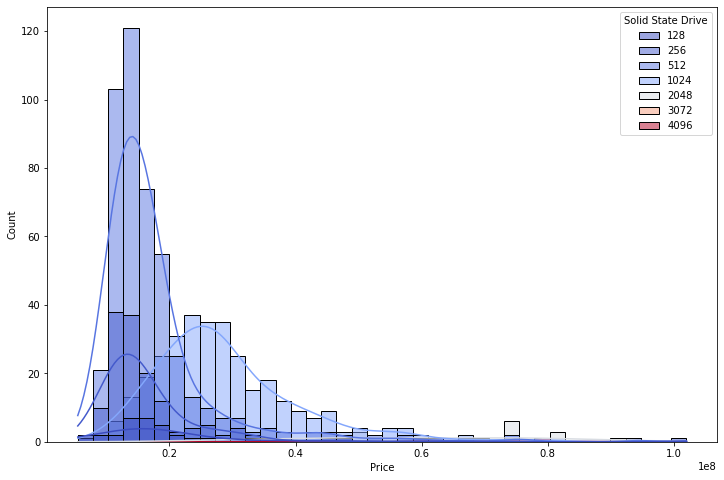

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Price', hue='Solid State Drive', bins=40, kde=True, palette='coolwarm')

<AxesSubplot:xlabel='Solid State Drive', ylabel='Price'>

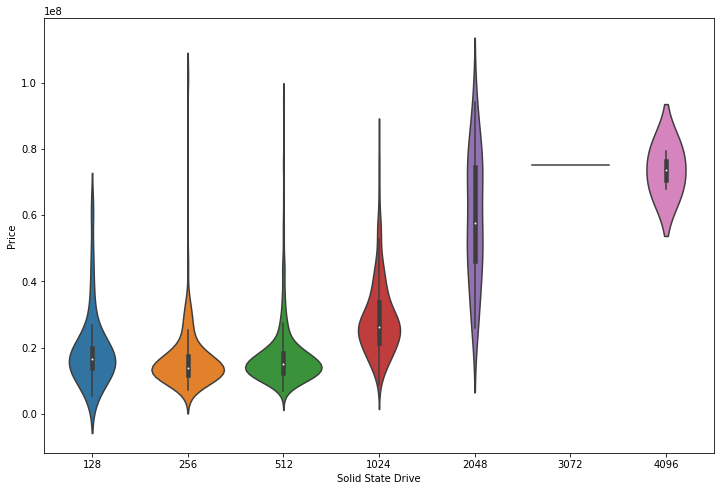

In [16]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x='Solid State Drive', y='Price')

#### Visualize Correlation between Max Speed and Price

<AxesSubplot:xlabel='Max Speed', ylabel='Price'>

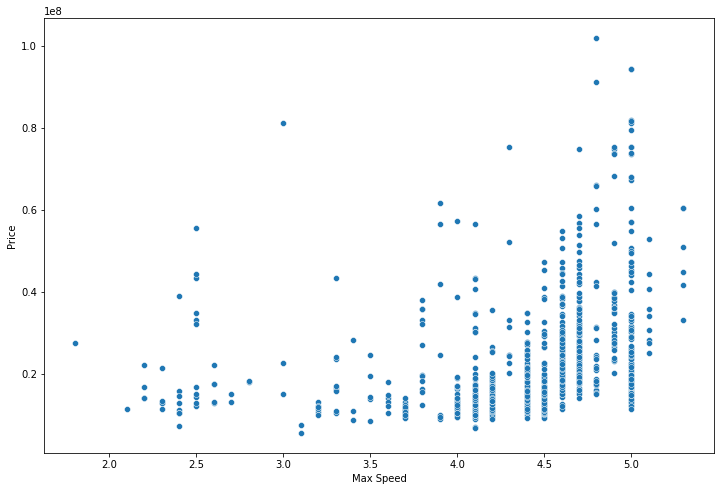

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Max Speed', y='Price', legend="full", palette='Set1')

<Figure size 864x576 with 0 Axes>

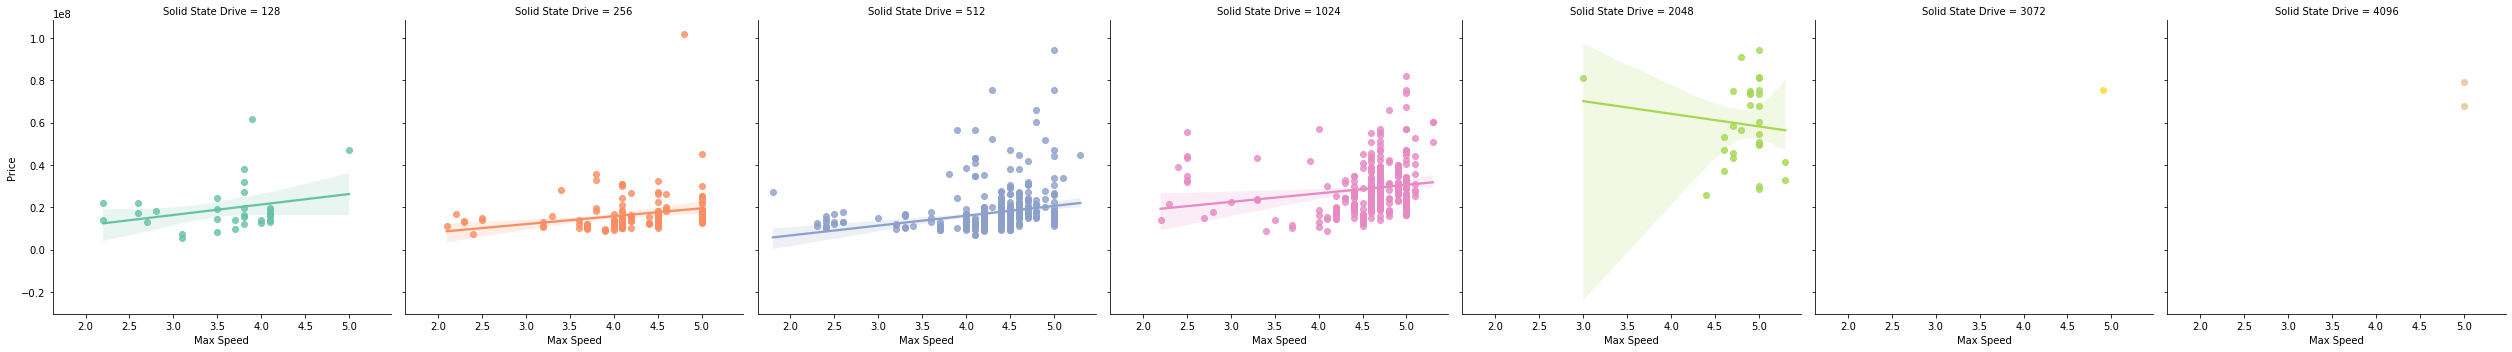

In [18]:
plt.figure(figsize=(12,8))
sns.lmplot(data=df, x='Max Speed', y='Price', hue='Solid State Drive', legend="full", palette='Set2', col='Solid State Drive')

#### Visualize Correlation Between Device Type and Price

<AxesSubplot:xlabel='Device Type', ylabel='Price'>

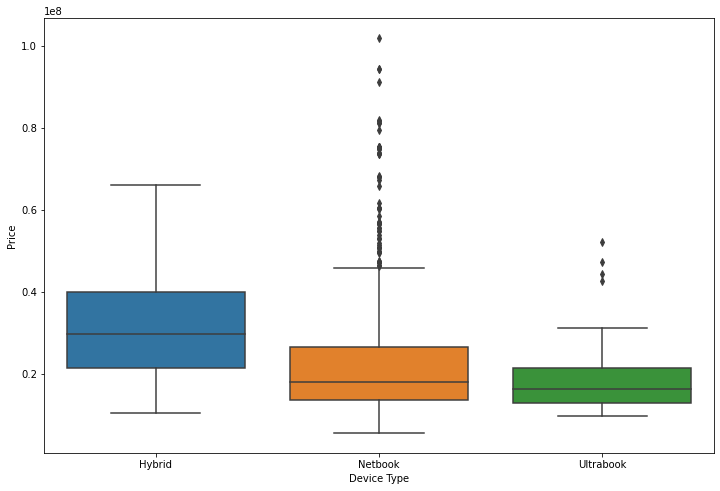

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Device Type", y="Price", order=sorted(df['Device Type'].unique()))

In [20]:
df.groupby('Device Type').mean()['Price']

Device Type
Hybrid       3.475275e+07
Netbook      2.243356e+07
Ultrabook    1.948167e+07
Name: Price, dtype: float64

In [21]:
df['Device Type'].value_counts()

Netbook      947
Ultrabook     34
Hybrid        13
Name: Device Type, dtype: int64

#### Check Correlation between Resolution and Price

In [22]:
def convertResolution (a):
    if '1920' in a.split() and '1080' in a.split():
        return '1920 x 1080 pixels'
    elif '1200' in a.split() and '1920' in a.split():
        return '1920 x 1200 pixels'
    else:
        return a
df['Resolution'] = [convertResolution(a) for a in df['Resolution']]

In [23]:
sorted_Resolution = sorted(df.Resolution.unique(), key=lambda x:int(x.split()[0]))

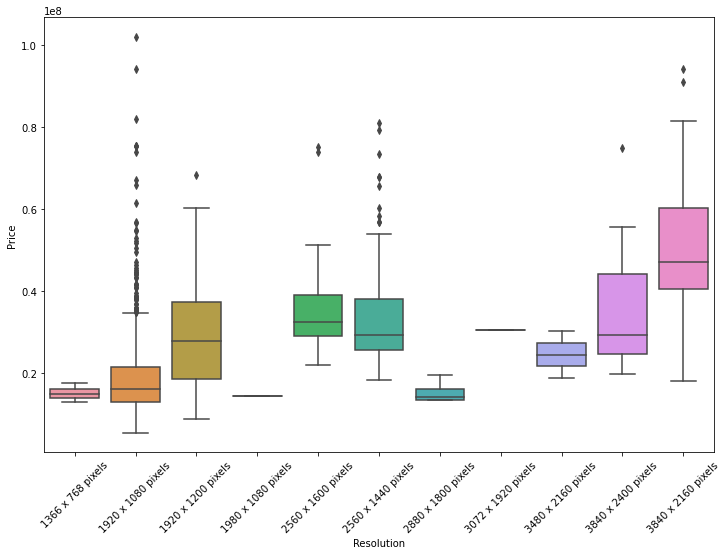

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Resolution", y="Price", order=sorted_Resolution)
plt.xticks(rotation=45);

#### Check Correlation between Laptop Brand and Price

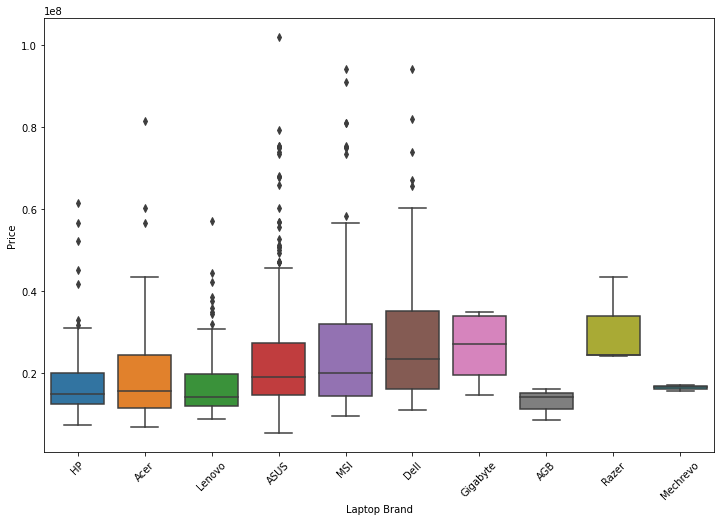

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Laptop Brand", y="Price")
plt.xticks(rotation=45);

#### Check Correlation between RAM and Price

In [26]:
def RAM_Palette(a):
    if a.split()[0] == '12':
        return "b"
    elif a.split()[0] == '16':
        return 'g'
    elif a.split()[0] == '32':
        return 'y'
    elif a.split()[0] == '64':
        return 'r'
    elif a.split()[0] == '8':
        return 'c'
    else:
        return 'm'
my_pal = {species: RAM_Palette(species) for species in df.RAM.unique()}

In [27]:
sorted_RAM = sorted(df.RAM.unique(), key=lambda x: int(x.split()[0]))

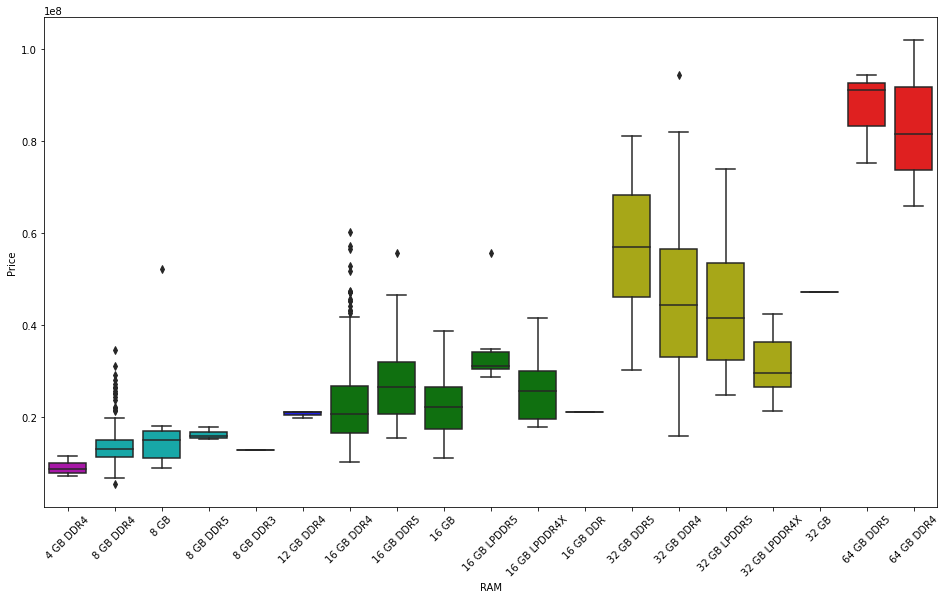

In [28]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df, x="RAM", y="Price", order=sorted_RAM, palette=my_pal)
plt.xticks(rotation=45);
# Higher RAM capacity is more expensive

#### Check Correlation betwenn OS and Price

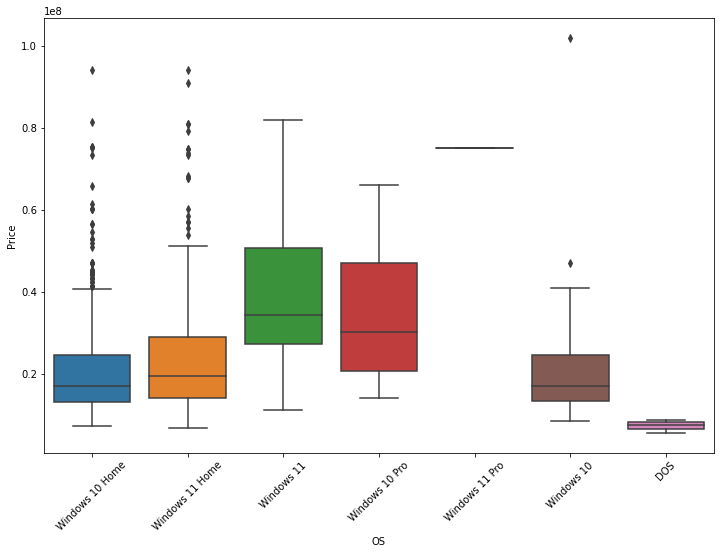

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="OS", y="Price")
plt.xticks(rotation=45);
# The graph below showed a acceptable correlatio between OS version and price.
# The higher a laptop's OS version, the higher its price.

<AxesSubplot:xlabel='Brand', ylabel='Price'>

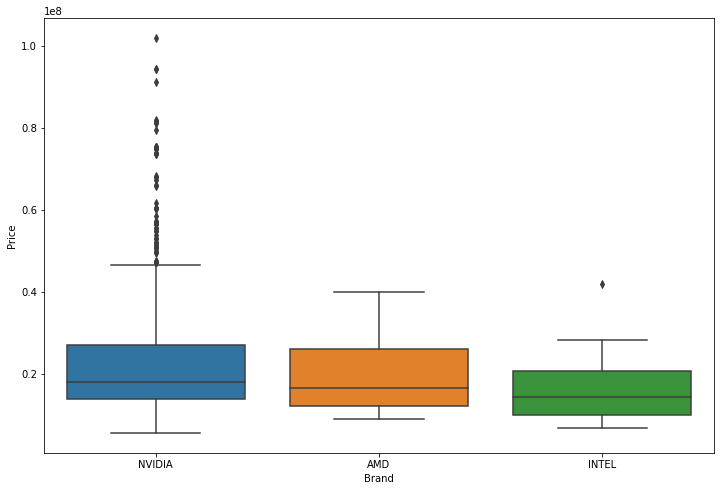

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="Brand", y="Price")

In [31]:
# Seems like there were no significant correlation between brand and price
df = df.drop('Brand', axis=1)

#### Check Correlation between Processor and Price

In [32]:
sorted_processor = sorted(df['Processor'].unique())

<AxesSubplot:xlabel='Processor', ylabel='Price'>

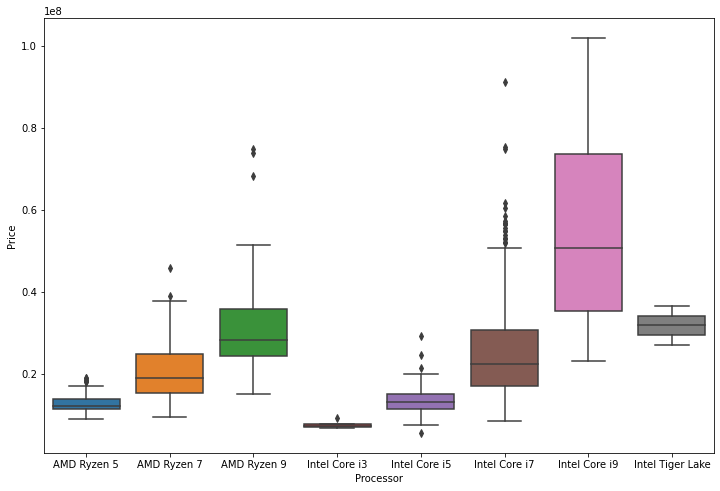

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Processor', y='Price', order=sorted_processor)

In [34]:
print("Selected columns as predictor : ")
df.columns

Selected columns as predictor : 


Index(['Device Type', 'Weight', 'Size', 'Resolution', 'PPI',
       'Solid State Drive', 'Laptop Brand', 'Price', 'OS', 'Touch',
       'Processor', 'RAM', 'Max Speed'],
      dtype='object')

## Categorical Variables and Dummy Variables

In [35]:
list(df.select_dtypes(['object']).columns)

['Device Type', 'Resolution', 'Laptop Brand', 'OS', 'Processor', 'RAM']

In [36]:
dummies = pd.get_dummies(df[list(df.select_dtypes(['object']).columns)])

In [37]:
df = pd.concat([df.drop(list(df.select_dtypes(['object']).columns), axis=1), dummies], axis=1)

In [38]:
df.columns

Index(['Weight', 'Size', 'PPI', 'Solid State Drive', 'Price', 'Touch',
       'Max Speed', 'Device Type_Hybrid', 'Device Type_Netbook',
       'Device Type_Ultrabook', 'Resolution_1366 x 768 pixels',
       'Resolution_1920 x 1080 pixels', 'Resolution_1920 x 1200 pixels',
       'Resolution_1980 x 1080 pixels', 'Resolution_2560 x 1440 pixels',
       'Resolution_2560 x 1600 pixels', 'Resolution_2880 x 1800 pixels',
       'Resolution_3072 x 1920 pixels', 'Resolution_3480 x 2160 pixels',
       'Resolution_3840 x 2160 pixels', 'Resolution_3840 x 2400 pixels',
       'Laptop Brand_AGB', 'Laptop Brand_ASUS', 'Laptop Brand_Acer',
       'Laptop Brand_Dell', 'Laptop Brand_Gigabyte', 'Laptop Brand_HP',
       'Laptop Brand_Lenovo', 'Laptop Brand_MSI', 'Laptop Brand_Mechrevo',
       'Laptop Brand_Razer', 'OS_DOS', 'OS_Windows 10', 'OS_Windows 10 Home',
       'OS_Windows 10 Pro', 'OS_Windows 11', 'OS_Windows 11 Home',
       'OS_Windows 11 Pro', 'Processor_AMD Ryzen 5', 'Processor_AMD Ryzen 

## Preparation to Create Model

#### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('Price', axis=1)
y = df['Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Model 1 : Multiple Linear Regression

#### Create Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regmodel = LinearRegression()

In [44]:
regmodel.fit(X_train, y_train)

LinearRegression()

In [45]:
print("Coefficients:\n {}".format(regmodel.coef_))

Coefficients:
 [ 6.95341231e+06  3.10313985e+05  3.01674776e+04  5.97380793e+03
  3.20486248e+06  4.80093682e+05  2.84367117e+06 -1.33327241e+06
 -1.51039876e+06 -8.20892569e+05 -2.13049967e+06  1.26787990e+06
 -8.91249831e+05 -6.49987550e+05  8.23613514e+05  2.05060769e+05
 -3.48578130e+06  1.46270012e+06  6.15918584e+06 -1.94002923e+06
 -1.74444776e+07 -6.52589028e+04 -2.06544324e+05  2.50442404e+06
  4.59050507e+06  1.52467274e+06  1.05179984e+06  2.45277486e+06
  7.75523554e+05  4.81658069e+06 -5.09801487e+06 -5.86698551e+05
 -2.15105539e+06  8.87033810e+06  2.99236639e+06 -4.02693567e+06
  1.86264515e-09 -4.48382786e+06 -1.96551330e+06  3.78947627e+06
 -3.40387675e+06 -4.83040727e+06  3.27835374e+05  8.58546740e+06
  1.98084612e+06 -5.41854033e+06 -9.18830573e+06 -9.94101814e+06
 -6.79534685e+06 -2.98967123e+06 -8.54342455e+06 -1.08327999e+06
  1.13467428e+06  6.28153209e+06  1.17874825e+07 -9.96945872e+04
  1.02186898e+07 -1.24084704e+07  3.25001224e+07  3.21179749e+07
 -9.450502

In [46]:
Predicted_Y = regmodel.predict(X_test)

Text(0.5, 0, 'Y Test')

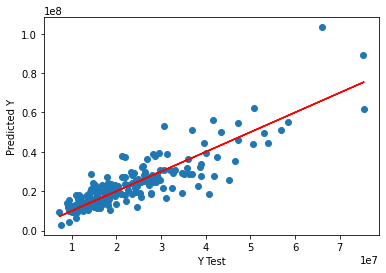

In [47]:
plt.scatter(x=y_test,y=Predicted_Y)
plt.plot(y_test,y_test,'r')
plt.ylabel('Predicted Y')
plt.xlabel('Y Test')

#### Evaluate Model

In [48]:
from sklearn import metrics

In [49]:
print("MAE: {}".format(metrics.mean_absolute_error(y_test,Predicted_Y)))
print("MSE: {}".format(metrics.mean_squared_error(y_test,Predicted_Y)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,Predicted_Y))))

MAE: 4010192.8252877193
MSE: 37215735768719.47
RMSE: 6100470.126860673


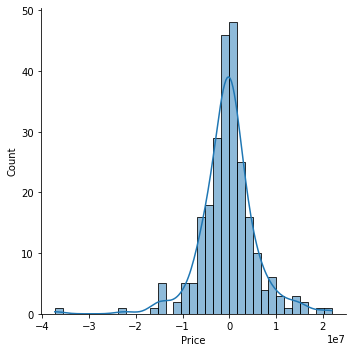

In [50]:
sns.displot((y_test-Predicted_Y),bins=35, kde=True)

In [51]:
MAPS_reg = np.abs(y_test-Predicted_Y)/y_test
MAPE_reg = np.mean(MAPS_reg)

In [52]:
print('The accuracy of the model is :', round((1-MAPE_reg)*100,2), '%')

The accuracy of the model is : 81.41 %


## Model 2 : Artificial Neural Network Regression

#### Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test)

In [57]:
X_train.shape

(745, 64)

In [58]:
X_test.shape

(249, 64)

#### Build ANN Structure

In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,activation

In [60]:
annmodel = Sequential()
annmodel.add(Dense(67, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(134, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(134, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(67, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(1))

annmodel.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsoluteError())

In [61]:
annmodel.fit(x=X_train,y=y_train, epochs=35, batch_size=6, verbose=2)

Epoch 1/35
125/125 - 2s - loss: 22906386.0000 - 2s/epoch - 15ms/step
Epoch 2/35
125/125 - 0s - loss: 21030458.0000 - 278ms/epoch - 2ms/step
Epoch 3/35
125/125 - 0s - loss: 10216700.0000 - 263ms/epoch - 2ms/step
Epoch 4/35
125/125 - 0s - loss: 8666568.0000 - 226ms/epoch - 2ms/step
Epoch 5/35
125/125 - 0s - loss: 8064519.5000 - 227ms/epoch - 2ms/step
Epoch 6/35
125/125 - 0s - loss: 7605201.5000 - 225ms/epoch - 2ms/step
Epoch 7/35
125/125 - 0s - loss: 7394428.5000 - 281ms/epoch - 2ms/step
Epoch 8/35
125/125 - 0s - loss: 7054534.5000 - 319ms/epoch - 3ms/step
Epoch 9/35
125/125 - 0s - loss: 6787681.0000 - 326ms/epoch - 3ms/step
Epoch 10/35
125/125 - 0s - loss: 6763190.0000 - 293ms/epoch - 2ms/step
Epoch 11/35
125/125 - 0s - loss: 6412085.5000 - 255ms/epoch - 2ms/step
Epoch 12/35
125/125 - 0s - loss: 6156379.5000 - 234ms/epoch - 2ms/step
Epoch 13/35
125/125 - 0s - loss: 6094161.5000 - 236ms/epoch - 2ms/step
Epoch 14/35
125/125 - 0s - loss: 5877121.5000 - 310ms/epoch - 2ms/step
Epoch 15/35
12

## Model Evaluation

<AxesSubplot:>

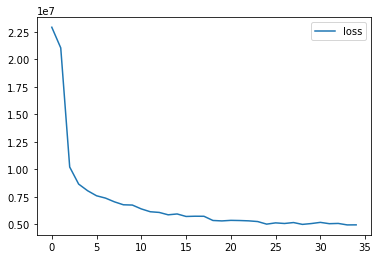

In [62]:
pd.DataFrame(annmodel.history.history).plot()

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [64]:
predictions = annmodel.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [65]:
print("Mean absolute error: ", mean_absolute_error(y_test, predictions))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("Explained variance score: ", explained_variance_score(y_test,predictions))

Mean absolute error:  4154302.066064257
Root mean squared error:  6305544.5031609405
Explained variance score:  0.717806304122202


Text(0.5, 0, 'Real Value')

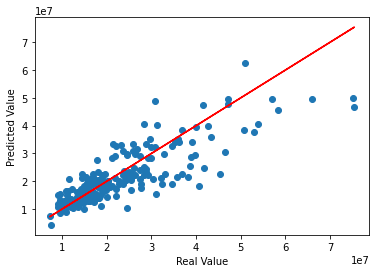

In [66]:
# Our predictions
plt.scatter(x=y_test,y=predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

plt.ylabel('Predicted Value')
plt.xlabel('Real Value')

In [67]:
errors = y_test.values.reshape(X_test.shape[0], 1) - predictions

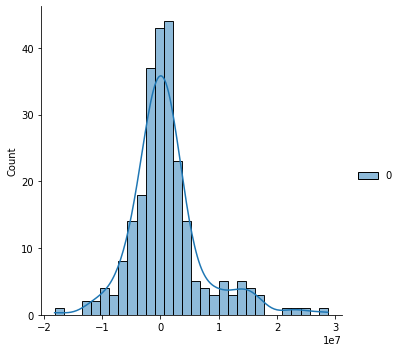

In [68]:
sns.displot(errors, kde=True, bins=30)

In [69]:
MAPS = []
for i in range(len(y_test)):
    MAPS.append(np.abs(y_test.iloc[i]-predictions[i][0])/y_test.iloc[i])
MAPE = np.mean(MAPS)

In [70]:
print('The accuracy of the model is :', round((1-MAPE)*100,2), '%')

The accuracy of the model is : 81.99 %


## Testing the Selected Model on a Random Dataset

In [71]:
# The selected model is Artificial Neural Network Regression Model because it had better accuracy
newX_test = df[350:551].drop('Price', axis=1)
newy_test = df[350:551]['Price']

In [72]:
newX_test = scaler.transform(newX_test)

In [73]:
new_predictions = annmodel.predict(newX_test)

7/7 [==============================] - 0s 2ms/step


Text(0.5, 0, 'Real Value')

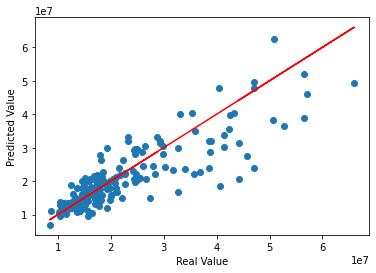

In [74]:
# Our predictions
plt.scatter(x=newy_test,y=new_predictions)

# Perfect predictions
plt.plot(newy_test,newy_test,'r')

plt.ylabel('Predicted Value')
plt.xlabel('Real Value')

In [75]:
new_MAPS = []
for i in range(len(newy_test)):
    new_MAPS.append(np.abs(newy_test.iloc[i]-new_predictions[i][0])/newy_test.iloc[i])
new_MAPE = np.mean(new_MAPS)

In [76]:
print('The accuracy of the model is :', round((1-new_MAPE)*100,2), '%')

The accuracy of the model is : 84.06 %


## Export Final Model

In [77]:
import joblib

In [78]:
X_train_final = df.drop('Price', axis=1).values
y_train_final = df['Price']

In [79]:
scaler = MinMaxScaler()

In [80]:
y_train_final

0       9425614.50
1      10368364.50
2      11311114.50
3      10653075.00
4      10368364.50
          ...     
995    17440875.00
996    19466844.75
997    32053311.45
998    18100611.45
999    14329611.45
Name: Price, Length: 994, dtype: float64

In [81]:
X_train_final = scaler.fit_transform(X_train_final)

In [82]:
annmodel = Sequential()
annmodel.add(Dense(67, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(134, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(134, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(67, activation='relu'))
annmodel.add(Dropout(0.2))
annmodel.add(Dense(1))

annmodel.compile(optimizer='adam',loss=tf.keras.losses.MeanAbsoluteError())

In [83]:
annmodel.fit(x=X_train_final,y=y_train_final, epochs=35, batch_size=6, verbose=2)

Epoch 1/35
166/166 - 2s - loss: 22431696.0000 - 2s/epoch - 11ms/step
Epoch 2/35
166/166 - 0s - loss: 15215193.0000 - 388ms/epoch - 2ms/step
Epoch 3/35
166/166 - 0s - loss: 8568266.0000 - 369ms/epoch - 2ms/step
Epoch 4/35
166/166 - 0s - loss: 7677956.0000 - 392ms/epoch - 2ms/step
Epoch 5/35
166/166 - 0s - loss: 7161255.0000 - 435ms/epoch - 3ms/step
Epoch 6/35
166/166 - 0s - loss: 6785143.5000 - 385ms/epoch - 2ms/step
Epoch 7/35
166/166 - 0s - loss: 6519857.5000 - 379ms/epoch - 2ms/step
Epoch 8/35
166/166 - 0s - loss: 6282226.0000 - 438ms/epoch - 3ms/step
Epoch 9/35
166/166 - 0s - loss: 5882678.5000 - 311ms/epoch - 2ms/step
Epoch 10/35
166/166 - 0s - loss: 5645282.5000 - 367ms/epoch - 2ms/step
Epoch 11/35
166/166 - 0s - loss: 5750742.0000 - 373ms/epoch - 2ms/step
Epoch 12/35
166/166 - 0s - loss: 5661842.0000 - 365ms/epoch - 2ms/step
Epoch 13/35
166/166 - 0s - loss: 5378304.0000 - 346ms/epoch - 2ms/step
Epoch 14/35
166/166 - 0s - loss: 5446483.5000 - 304ms/epoch - 2ms/step
Epoch 15/35
166

<AxesSubplot:>

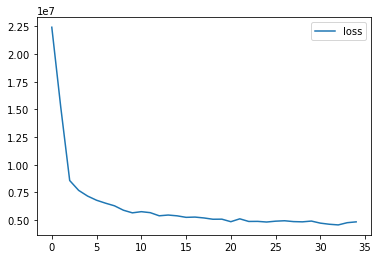

In [84]:
pd.DataFrame(annmodel.history.history).plot()

In [85]:
model_name = "laptopestimate.h5"

In [86]:
# Export the scaler
joblib.dump(scaler, 'scaler.gz')
# Export the model
annmodel.save(model_name)
# Export final datas used to train the model
df.to_csv("Trainerdata.csv", index=False)

## Conclusion 

#### Several observations can be concluded from the analysis above :

* Solid State Drive predictor has the strongest correlation with Price among the continuous variable datas.
* Processor, RAM, and Resolution have strong correlation with Price among the categorical variable datas.
* Weight of a laptop has strong correlation to size of a laptop which is make sense.
* Artifical neural network model has better performance compare to multiple linear regression model but with only a little difference in mean error percentage.